In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

In [2]:
# 1. Dataset Acquisition
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# 2. Data Preprocessing
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [4]:
# Flatten images from 28x28 to 784
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

In [5]:
# Convert labels to one-hot vectors
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [7]:
# 3. Data Splitting (split training into train + validation)
from sklearn.model_selection import train_test_split
x_train, x_val, y_train_cat, y_val_cat = train_test_split(
    x_train, y_train_cat, test_size=0.1, random_state=42
)

In [8]:
# 4. Model Architecture
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# 5. Compile the Model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [10]:
# 6. Training
history = model.fit(
    x_train, y_train_cat,
    epochs=20,
    batch_size=128,
    validation_data=(x_val, y_val_cat),
    verbose=2
)

Epoch 1/20
422/422 - 5s - 12ms/step - accuracy: 0.9045 - loss: 0.3447 - val_accuracy: 0.9482 - val_loss: 0.1737
Epoch 2/20
422/422 - 3s - 8ms/step - accuracy: 0.9581 - loss: 0.1425 - val_accuracy: 0.9610 - val_loss: 0.1279
Epoch 3/20
422/422 - 2s - 5ms/step - accuracy: 0.9698 - loss: 0.1011 - val_accuracy: 0.9723 - val_loss: 0.0953
Epoch 4/20
422/422 - 2s - 5ms/step - accuracy: 0.9771 - loss: 0.0748 - val_accuracy: 0.9737 - val_loss: 0.0922
Epoch 5/20
422/422 - 2s - 5ms/step - accuracy: 0.9822 - loss: 0.0594 - val_accuracy: 0.9760 - val_loss: 0.0793
Epoch 6/20
422/422 - 2s - 5ms/step - accuracy: 0.9858 - loss: 0.0474 - val_accuracy: 0.9742 - val_loss: 0.0907
Epoch 7/20
422/422 - 3s - 7ms/step - accuracy: 0.9872 - loss: 0.0396 - val_accuracy: 0.9793 - val_loss: 0.0717
Epoch 8/20
422/422 - 3s - 7ms/step - accuracy: 0.9904 - loss: 0.0318 - val_accuracy: 0.9755 - val_loss: 0.0849
Epoch 9/20
422/422 - 4s - 10ms/step - accuracy: 0.9919 - loss: 0.0260 - val_accuracy: 0.9800 - val_loss: 0.0723

In [11]:
# 7. Evaluation
test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=0)
print(f"Test accuracy: {test_acc:.4f}")

Test accuracy: 0.9775


In [12]:
# Predict labels for confusion matrix
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_cat, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [13]:
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes))


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.97      0.98      0.98      1010
           4       0.98      0.97      0.98       982
           5       0.98      0.98      0.98       892
           6       0.97      0.98      0.98       958
           7       0.99      0.96      0.97      1028
           8       0.97      0.96      0.97       974
           9       0.97      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [14]:
print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred_classes))

Confusion Matrix:
[[ 971    0    1    0    0    1    5    1    1    0]
 [   0 1122    4    1    0    1    1    0    6    0]
 [   5    2 1008    4    1    0    2    3    6    1]
 [   2    0    2  993    0    5    0    4    3    1]
 [   0    0    2    1  955    0    9    2    1   12]
 [   2    0    0   11    1  871    3    0    1    3]
 [   5    1    1    1    1    4  943    0    2    0]
 [   3    3   11    4    4    0    0  990    5    8]
 [   6    0    6    7    2    8    4    2  935    4]
 [   3    3    0    1    7    3    1    2    2  987]]


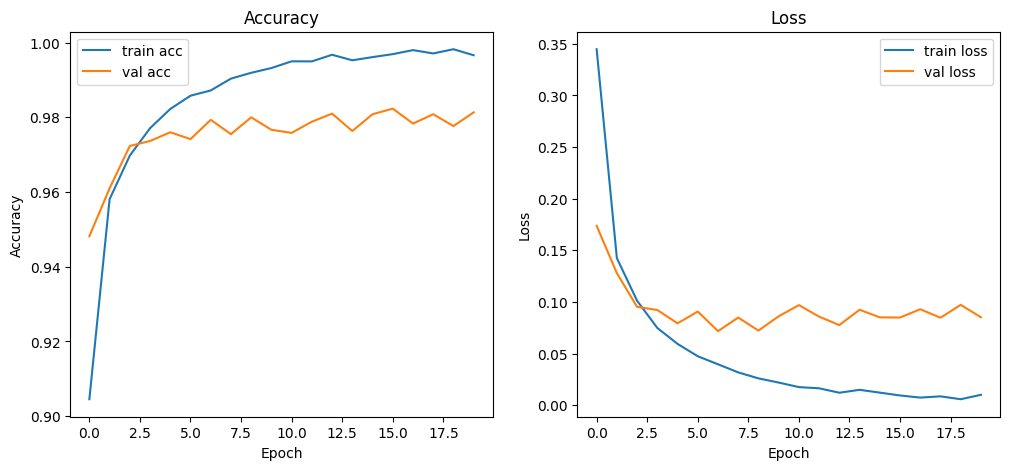

In [15]:
# 8. Visualization

# Plot accuracy and loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

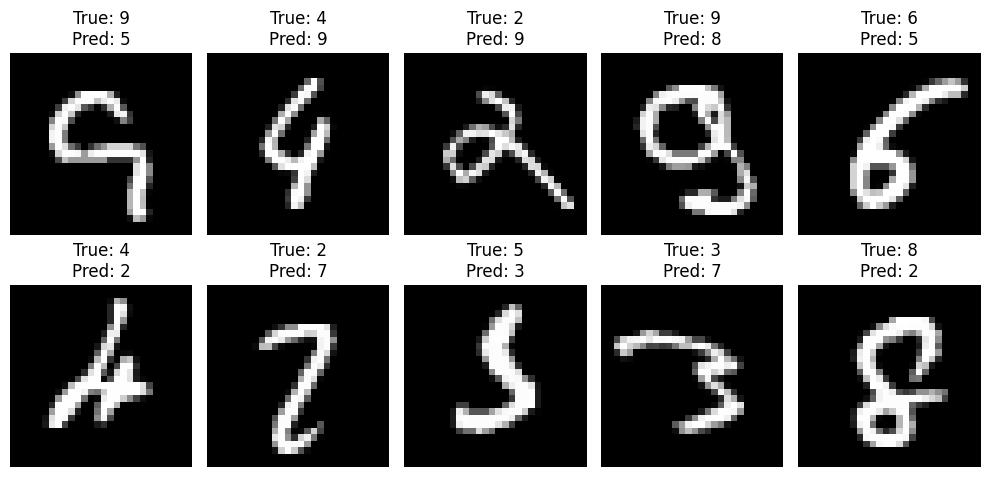

In [16]:
# Visualize some misclassified examples
misclassified_idx = np.where(y_pred_classes != y_true)[0]
plt.figure(figsize=(10, 5))
for i, idx in enumerate(misclassified_idx[:10]):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[idx].reshape(28,28), cmap='gray')
    plt.title(f"True: {y_true[idx]}\nPred: {y_pred_classes[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()